In [2]:
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv("GDSC_DATASET.csv")
df.head()

,COSMIC_ID,CELL_LINE_NAME,TCGA_DESC,DRUG_ID,DRUG_NAME,LN_IC50,AUC,Z_SCORE,GDSC Tissue descriptor 1,GDSC Tissue descriptor 2,Cancer Type (matching TCGA label),Microsatellite instability Status (MSI),Screen Medium,Growth Properties,CNA,Gene Expression,Methylation,TARGET,TARGET_PATHWAY
0,683667,PFSK-1,MB,1003,Camptothecin,-1.463887,0.930220,0.433123,nervous_system,medulloblastoma,MB,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
1,684057,ES5,UNCLASSIFIED,1003,Camptothecin,-3.360586,0.791072,-0.599569,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
2,684059,ES7,UNCLASSIFIED,1003,Camptothecin,-5.044940,0.592660,-1.516647,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
3,684062,EW-11,UNCLASSIFIED,1003,Camptothecin,-3.741991,0.734047,-0.807232,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
4,684072,SK-ES-1,UNCLASSIFIED,1003,Camptothecin,-5.142961,0.582439,-1.570016,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Semi-Adherent,Y,Y,Y,TOP1,DNA replication


In [5]:
df.isnull().sum()

COSMIC_ID                                      0
CELL_LINE_NAME                                 0
TCGA_DESC                                   1067
DRUG_ID                                        0
DRUG_NAME                                      0
LN_IC50                                        0
AUC                                            0
Z_SCORE                                        0
GDSC Tissue descriptor 1                    9366
GDSC Tissue descriptor 2                    9366
Cancer Type (matching TCGA label)          51446
Microsatellite instability Status (MSI)    12353
Screen Medium                               9366
Growth Properties                           9366
CNA                                         9366
Gene Expression                             9366
Methylation                                 9366
TARGET                                     27155
TARGET_PATHWAY                                 0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242035 entries, 0 to 242034
Data columns (total 19 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   COSMIC_ID                                242035 non-null  int64  
 1   CELL_LINE_NAME                           242035 non-null  object 
 2   TCGA_DESC                                240968 non-null  object 
 3   DRUG_ID                                  242035 non-null  int64  
 4   DRUG_NAME                                242035 non-null  object 
 5   LN_IC50                                  242035 non-null  float64
 6   AUC                                      242035 non-null  float64
 7   Z_SCORE                                  242035 non-null  float64
 8   GDSC Tissue descriptor 1                 232669 non-null  object 
 9   GDSC Tissue descriptor 2                 232669 non-null  object 
 10  Cancer Type (matching TCGA label

In [10]:
# 1. Fill missing categorical values with 'Unknown'
categorical_columns = ['TCGA_DESC', 'GDSC Tissue descriptor 1', 'GDSC Tissue descriptor 2', 
                       'Cancer Type (matching TCGA label)', 'Microsatellite instability Status (MSI)', 
                       'Screen Medium', 'Growth Properties']
df[categorical_columns] = df[categorical_columns].fillna('Unknown')

# 2. Fill missing binary columns with a default value ('N' for 'No')
binary_columns = ['CNA', 'Gene Expression', 'Methylation']
df[binary_columns] = df[binary_columns].fillna('N')

# 3. Fill missing numeric values (if any) with appropriate values
numeric_columns = ['LN_IC50', 'AUC', 'Z_SCORE']  # Add numeric columns if any have missing values
df[numeric_columns] = df[numeric_columns].apply(lambda col: col.fillna(col.median()))

# 4. Fill missing 'TARGET' column with 'Unknown'
df['TARGET'] = df['TARGET'].fillna('Unknown')

# 5. Verify all missing values are handled
missing_after_cleaning = df.isnull().sum()

print("Missing values after cleaning:")
print(missing_after_cleaning)

# Save the cleaned dataset
df.to_csv('cleaned_dataset.csv', index=False)

Missing values after cleaning:
COSMIC_ID                                  0
CELL_LINE_NAME                             0
TCGA_DESC                                  0
DRUG_ID                                    0
DRUG_NAME                                  0
LN_IC50                                    0
AUC                                        0
Z_SCORE                                    0
GDSC Tissue descriptor 1                   0
GDSC Tissue descriptor 2                   0
Cancer Type (matching TCGA label)          0
Microsatellite instability Status (MSI)    0
Screen Medium                              0
Growth Properties                          0
CNA                                        0
Gene Expression                            0
Methylation                                0
TARGET                                     0
TARGET_PATHWAY                             0
dtype: int64


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242035 entries, 0 to 242034
Data columns (total 19 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   COSMIC_ID                                242035 non-null  int64  
 1   CELL_LINE_NAME                           242035 non-null  object 
 2   TCGA_DESC                                242035 non-null  object 
 3   DRUG_ID                                  242035 non-null  int64  
 4   DRUG_NAME                                242035 non-null  object 
 5   LN_IC50                                  242035 non-null  float64
 6   AUC                                      242035 non-null  float64
 7   Z_SCORE                                  242035 non-null  float64
 8   GDSC Tissue descriptor 1                 242035 non-null  object 
 9   GDSC Tissue descriptor 2                 242035 non-null  object 
 10  Cancer Type (matching TCGA label

<Axes: >

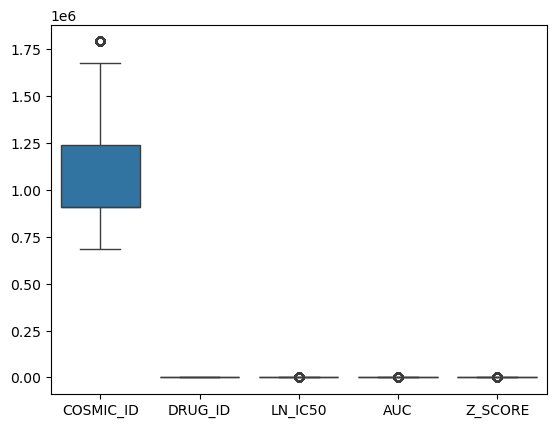

In [12]:
sns.boxplot(df)

In [4]:
df = pd.read_csv("cleaned_dataset.csv")

In [5]:
df.head()

,COSMIC_ID,CELL_LINE_NAME,TCGA_DESC,DRUG_ID,DRUG_NAME,LN_IC50,AUC,Z_SCORE,GDSC Tissue descriptor 1,GDSC Tissue descriptor 2,Cancer Type (matching TCGA label),Microsatellite instability Status (MSI),Screen Medium,Growth Properties,CNA,Gene Expression,Methylation,TARGET,TARGET_PATHWAY
0,683667,PFSK-1,MB,1003,Camptothecin,-1.463887,0.930220,0.433123,nervous_system,medulloblastoma,MB,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
1,684057,ES5,UNCLASSIFIED,1003,Camptothecin,-3.360586,0.791072,-0.599569,bone,ewings_sarcoma,Unknown,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
2,684059,ES7,UNCLASSIFIED,1003,Camptothecin,-5.044940,0.592660,-1.516647,bone,ewings_sarcoma,Unknown,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
3,684062,EW-11,UNCLASSIFIED,1003,Camptothecin,-3.741991,0.734047,-0.807232,bone,ewings_sarcoma,Unknown,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
4,684072,SK-ES-1,UNCLASSIFIED,1003,Camptothecin,-5.142961,0.582439,-1.570016,bone,ewings_sarcoma,Unknown,MSS/MSI-L,R,Semi-Adherent,Y,Y,Y,TOP1,DNA replication


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242035 entries, 0 to 242034
Data columns (total 19 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   COSMIC_ID                                242035 non-null  int64  
 1   CELL_LINE_NAME                           242035 non-null  object 
 2   TCGA_DESC                                242035 non-null  object 
 3   DRUG_ID                                  242035 non-null  int64  
 4   DRUG_NAME                                242035 non-null  object 
 5   LN_IC50                                  242035 non-null  float64
 6   AUC                                      242035 non-null  float64
 7   Z_SCORE                                  242035 non-null  float64
 8   GDSC Tissue descriptor 1                 242035 non-null  object 
 9   GDSC Tissue descriptor 2                 242035 non-null  object 
 10  Cancer Type (matching TCGA label

In [12]:
# cap outliers by replacing values below or above a certain threshold (e.g., 1.5 × IQR) with the nearest acceptable value.
def cap_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  # 25th percentile
        Q3 = df[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Cap the values
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df

# Apply capping on numeric columns
numeric_columns = ["LN_IC50", "AUC", "Z_SCORE"]
df = cap_outliers(df, numeric_columns)

# Display the updated DataFrame
print(df)

        COSMIC_ID CELL_LINE_NAME     TCGA_DESC  DRUG_ID          DRUG_NAME  \
0          683667         PFSK-1            MB     1003       Camptothecin   
1          684057            ES5  UNCLASSIFIED     1003       Camptothecin   
2          684059            ES7  UNCLASSIFIED     1003       Camptothecin   
3          684062          EW-11  UNCLASSIFIED     1003       Camptothecin   
4          684072        SK-ES-1  UNCLASSIFIED     1003       Camptothecin   
...           ...            ...           ...      ...                ...   
242030    1659928        SNU-175        COREAD     2499  N-acetyl cysteine   
242031    1660034        SNU-407        COREAD     2499  N-acetyl cysteine   
242032    1660035         SNU-61        COREAD     2499  N-acetyl cysteine   
242033    1674021         SNU-C5        COREAD     2499  N-acetyl cysteine   
242034    1789883           DiFi        COREAD     2499  N-acetyl cysteine   

         LN_IC50       AUC   Z_SCORE GDSC Tissue descriptor 1  

<Axes: ylabel='AUC'>

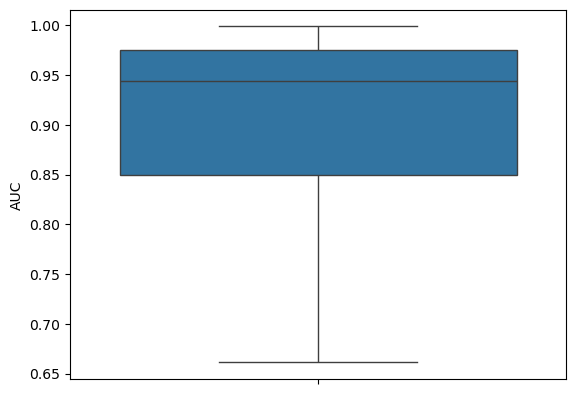

In [11]:
sns.boxplot(df["AUC"])